In [1]:
from matplotlib import pyplot as plt
import numpy as np

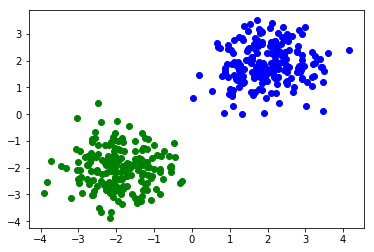

In [7]:
A = np.random.multivariate_normal([2, -2, 2], 0.5*np.identity(3), size=100)
B = np.random.multivariate_normal([-2, 2, -2], 0.5*np.identity(3), size=100)
a = A[:, [0, 2]]
b = B[:, [0, 2]]
plt.plot(a[:,0], a[:,1], 'bo')
plt.plot(b[:,0], b[:,1], 'go')
plt.show()

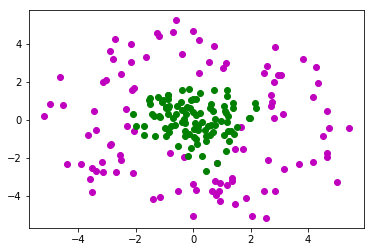

In [49]:
n = 100
theta = np.random.uniform(0, 2*np.pi, size=n)
r = 4 + np.random.normal(size=n)
X0 = np.array([r*np.cos(theta), r*np.sin(theta)]).T
X1 = np.random.multivariate_normal([0, 0], np.identity(2), size=n)
T = np.concatenate([X0, X1])
X = np.hstack([T, T**2])
y0 = np.zeros(len(X0))
y1 = np.ones(len(X1))
y = np.concatenate([y0, y1])
plt.plot(X0[:,0], X0[:,1], 'mo')
plt.plot(X1[:,0], X1[:,1], 'go')
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
R = LogisticRegression()
R.fit(X, y)
R.coef_
R.intercept_

array([ 3.80133316])

In [42]:
print(XX.shape, y.shape)

(200, 4) (200,)


In [43]:
XX[:10,:]

array([[  0.26881605,   4.53209534,   0.07226207,  20.53988815],
       [  1.23802315,  -2.1767003 ,   1.53270132,   4.73802418],
       [ -4.58630474,   1.40253546,  21.03419118,   1.96710572],
       [  2.32762014,  -0.90632307,   5.41781551,   0.82142151],
       [ -0.31748048,  -3.28870252,   0.10079386,  10.81556426],
       [ -4.06449586,   0.50677734,  16.52012661,   0.25682327],
       [  1.85141625,   1.90146787,   3.42774213,   3.61558004],
       [ -0.14942539,  -4.31010869,   0.02232795,  18.5770369 ],
       [  4.56236372,  -2.02997485,  20.81516272,   4.12079791],
       [ -0.96788109,   1.8648451 ,   0.9367938 ,   3.47764726]])